# Figure Plotting

In [1]:
## Import libraries
# import redSunFuncs as rs
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
import netCDF4 as net
import scipy as sp
import pickle
from scipy.interpolate import interp1d
import traceback
#from mpl_toolkits import basemap
#from mpl_toolkits.basemap import Basemap
# from mcd3 import mcd
from matplotlib import rcParams
# import matplotlib.ticker

## Figure 1

In [2]:
## Open Netcdf File
rootgrp = net.Dataset('onlyJC.nc', "r", format="NETCDF4", fill_value=0)

## Initiate calcDict dictionary
## This is the workhorse of the following plots
calcDict = {}

## Define functions for amassing all the data in a netcdf file!
def add_to_dict(x,d,f):
    d[x] = np.array(f[x])
    return d

def add_to_dict2(x,d):
    variables = list(rootgrp.groups[x].variables)
    [add_to_dict(y,calcDict,rootgrp[x].variables) for y in variables]
    return d

## Capture netcdf data
variables = list(rootgrp.variables)
[add_to_dict(x,calcDict,rootgrp.variables) for x in variables]
#
groups = list(rootgrp.groups)
[add_to_dict2(x,calcDict) for x in groups]
print('yay data!')

## When you're done with this dataset, you need to close it!
rootgrp.close()

yay data!


<Figure size 432x288 with 0 Axes>

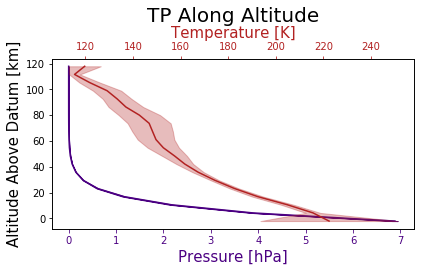

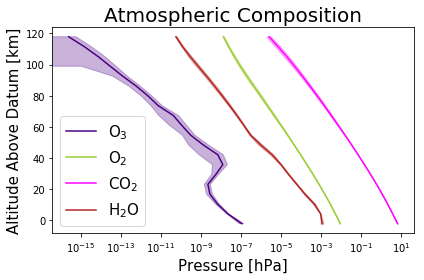

In [229]:
# ## Plot Atmosphere Profiles
# ## Plot TP Curve Along Altitude

# alt = calcDict['altDatum'][0,0,:]

# figdir = 'figures/'

# ## Plot the TP Along Altitude
# plt.figure()
# fig, ax1 = plt.subplots()
# avg = np.average(np.average(calcDict['pressure'][0,0,:,:,:],1),1)
# std = np.std(np.average(calcDict['pressure'][0,0,:,:,:],1),1)
# ax1.plot(avg, alt, color='indigo')
# ax1.fill_betweenx(alt, avg-std, color = 'indigo',x2=avg+std)
# ax1.set_xlabel('Pressure [hPa]', color = 'indigo', fontsize=15)
# ax1.set_ylabel('Altitude Above Datum [km]', fontsize=15)
# ax1.tick_params('x', colors='indigo')
# ax2 = ax1.twiny()
# avg = np.average(np.average(calcDict['temperature'][0,0,:,:,:],1),1)
# std = np.std(np.average(calcDict['temperature'][0,0,:,:,:],1),1)
# ax2.plot(avg, alt, color='firebrick')
# ax2.fill_betweenx(alt, avg-std, x2=avg+std, alpha=0.3, color='firebrick')
# ax2.set_xlabel('Temperature [K]', color='firebrick', fontsize=15)
# ax2.set_title('TP Along Altitude',y=1.18, fontsize=20)
# ax2.tick_params('x', colors='firebrick')
# fig.tight_layout()
# fig.savefig(figdir+'TP Along Altitude.png',dpi=300, bbox_inches='tight')


# ## Plot Atmospheric Composition Along Altitude
# pps = calcDict['pressure']*[calcDict['O3_pp'], calcDict['O2_pp'], calcDict['CO2_pp'], 
#                             calcDict['H2O_pp']]/calcDict['airdensity']
# colors = ['indigo', 'yellowgreen', 'fuchsia', 'firebrick']
# labels = [r'O$_{3}$', r'O$_{2}$', r'CO$_{2}$', r'H$_{2}$O']

# ind = 0
# plt.figure()
# for pp in pps:
#     avg = np.average(np.average(pp[0,0,:,:,:],2),1)
#     std = np.std(np.average(pp[0,0,:,:,:],1),1)
#     plt.semilogx(avg, alt, color=colors[ind], label = labels[ind])
#     plt.fill_betweenx(alt, avg-std, x2=avg+std, alpha=0.3, color=colors[ind])
#     ind += 1
# plt.xlabel('Pressure [hPa]',fontsize=15)
# plt.ylabel('Altitude Above Datum [km]',fontsize=15)
# plt.title('Atmospheric Composition',fontsize=20)
# plt.legend(fontsize=15)
# plt.tight_layout()
# plt.savefig(figdir+'Atmospheric Composition.png',dpi=300, bbox_inches='tight')


# ## Plot Aerosol Sizes
# # pps = [calcDict['reff_ice'], calcDict['reff_dust']]
# # plt.figure()
# # for pp in pps:
# #     avg = np.average(np.average(pp[0,0,:,:,:],1),1)
# #     std = np.std(np.average(pp[0,0,:,:,:],1),1)
# #     plt.semilogx(avg, alt)
# #     plt.fill_betweenx(alt, avg+std, x2=avg-std, alpha=0.3)
# # plt.xlabel(r'Effective Radii [$\mu$m]',fontsize=15)
# # plt.ylabel('Altitude Above Datum [km]',fontsize=15)
# # plt.title('Aerosol Distributions',fontsize=20)
# # plt.tight_layout()
# # # plt.savefig(figdir+'Aerosol Distributions.png',dpi=300, bbox_inches='tight')

# # ## Plot Aerosol Content
# # pps = [calcDict['content_ice'], calcDict['content_dust']]
# # labels = ['ice', 'dust']
# # ind = 0
# # plt.figure()
# # for pp in pps:
# #     avg = np.average(np.average(pp[0,0,:,:,:],1),1)
# #     std = np.std(np.average(pp[0,0,:,:,:],1),1)
# #     plt.semilogx(avg, alt, label=labels[ind])
# #     plt.fill_betweenx(alt, avg+std, x2=avg-std, alpha=.3)
# #     ind += 1
# # plt.xlabel('Concentration [g/mol]',fontsize=15)
# # plt.ylabel('Altitude Above Datum [km]',fontsize=15)
# # plt.title('Aerosol Content',fontsize=20)
# # plt.legend(fontsize=15)
# # plt.tight_layout()
# # plt.savefig(figdir+'Aerosol Content.png',dpi=300, bbox_inches='tight')




[Text(0, 1, '100'), Text(0, 1, ''), Text(0, 1, '250')]

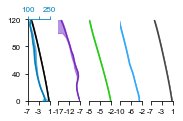

In [3]:
## Plot Atmospheric Composition Along Altitude

# pull necessary data from file
alt = calcDict['altDatum'][0,0,:]

ozone_pre = calcDict['pressure'] * calcDict['O3_pp'] / calcDict['airdensity']
oxygen_pre = calcDict['pressure'] * calcDict['O2_pp'] / calcDict['airdensity']
CO2_pre = calcDict['pressure'] * calcDict['CO2_pp'] / calcDict['airdensity']
H2O_pre = calcDict['pressure'] * calcDict['H2O_pp'] / calcDict['airdensity']
pressure_pre = calcDict['pressure']
                
ozone_avg = np.average(np.average(ozone_pre[0,0,:,:,:],1),1)
ozone_std = np.std(np.average(ozone_pre[0,0,:,:,:],1),1)

oxygen_avg = np.average(np.average(oxygen_pre[0,0,:,:,:],1),1)
oxygen_std = np.std(np.average(oxygen_pre[0,0,:,:,:],1),1)

CO2_avg = np.average(np.average(CO2_pre[0,0,:,:,:],1),1)
CO2_std = np.std(np.average(CO2_pre[0,0,:,:,:],1),1)

H2O_avg = np.average(np.average(H2O_pre[0,0,:,:,:],1),1)
H2O_std = np.std(np.average(H2O_pre[0,0,:,:,:],1),1)

pressure_avg = np.average(np.average(pressure_pre[0,0,:,:,:],1),1)
pressure_std = np.std(np.average(pressure_pre[0,0,:,:,:],1),1)

temp_avg = np.average(np.average(calcDict['temperature'][0,0,:,:,:],1),1)
temp_std = np.std(np.average(calcDict['temperature'][0,0,:,:,:],1),1)


# plotting code
plt.figure(1,figsize=(2.6,1.5))
plt.subplots_adjust(wspace=0.4)

# ozone
ax1 = plt.subplot(1,5,2)

altRange = [0,40,80,120]
ax1.set_ylim(0,120)
# ax1.set_yticks(altRange)
# ax1.set_yticklabels(altRange,fontname='Arial',fontsize=8)
ax1.set_yticks([])
ax1.set_yticklabels([])

ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.semilogx(ozone_avg,alt,color='#752ac3')
ax1.fill_betweenx(alt,ozone_avg+ozone_std,
                  x2=ozone_avg-ozone_std,color='#752ac3',
                 alpha=0.5)

ax1.set_xlim(1e-16,1e-7)
ozticks = [1e-17,1e-12,1e-7]
ozlabel = [-17,-12,-7]
ax1.set_xticks(ozticks)
ax1.set_xticklabels(ozlabel,fontname='Arial',fontsize=8)

# Oxygen
ax2 = plt.subplot(1,5,3)

ax2.set_ylim(0,120)
ax2.set_yticks([])
ax2.set_yticklabels([])

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.semilogx(oxygen_avg,alt,color='#23cb12')
ax2.fill_betweenx(alt,oxygen_avg+oxygen_std,
                  x2=oxygen_avg-oxygen_std,color='#23cb12',
                 alpha=0.5)

ax2.set_xlim(1e-8,1e-5,1e-2)
oxticks = [1e-8,1e-5,1e-2]
oxlabel = [-8,-5,-2]
ax2.set_xticks(oxticks)
ax2.set_xticklabels(oxlabel,fontname='Arial',fontsize=8)

# H2O
ax3 = plt.subplot(1,5,4)

ax3.set_ylim(0,120)
ax3.set_yticks([])
ax3.set_yticklabels([])

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax3.semilogx(H2O_avg,alt,color='#30a7fa')
ax3.fill_betweenx(alt,H2O_avg+H2O_std,
                  x2=H2O_avg-H2O_std,color='#30a7fa',
                 alpha=0.5)

ax3.set_xlim(1e-10,1e-6,1e-2)
h2oticks = [1e-10,1e-6,1e-2]
h2olabel = [-10,-6,-2]
ax3.set_xticks(h2oticks)
ax3.set_xticklabels(h2olabel,fontname='Arial',fontsize=8)


# CO2
ax4 = plt.subplot(1,5,5)

ax4.set_ylim(0,120)
ax4.set_yticks([])
ax4.set_yticklabels([])

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)

ax4.semilogx(CO2_avg,alt,color='#464646')
ax4.fill_betweenx(alt,CO2_avg+CO2_std,
                  x2=CO2_avg-CO2_std,color='#464646',
                 alpha=0.5)

ax4.set_xlim(1e-7,1e-3,1e1)
co2ticks = [1e-7,1e-3,1e1]
co2label = [-7,-3,1]
ax4.set_xticks(co2ticks)
ax4.set_xticklabels(co2label,fontname='Arial',fontsize=8)

#total pressure
ax5 = plt.subplot(1,5,1)

ax5.set_ylim(0,120)


ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
# ax5.spines['left'].set_visible(False)

ax5.semilogx(pressure_avg,alt,color='k')
ax5.fill_betweenx(alt,pressure_avg+pressure_std,
                  x2=pressure_avg-pressure_std,color='k',
                 alpha=0.5)

ax5.set_xlim(1e-7,1e-3,1e1)
pticks = [1e-7,1e-3,1e1]
plabel = [-7,-3,1]
ax5.set_xticks(pticks)
ax5.set_xticklabels(plabel,fontname='Arial',fontsize=8)

ax5.set_ylim(0,120)
ax5.set_yticks(altRange)
ax5.set_yticklabels(altRange,fontname='Arial',fontsize=8)

ax5T = ax5.twiny()
ax5T.plot(temp_avg,alt,color='#007ebc')
ax5T.fill_betweenx(alt,temp_avg+temp_std,
                  x2=temp_avg-temp_std,color='#007ebc',
                 alpha=0.5)

ax5T.spines['left'].set_visible(False)
ax5T.spines['right'].set_visible(False)
ax5T.spines['bottom'].set_visible(False)
ax5T.spines['top'].set_color('#007ebc')
ax5T.tick_params(axis='x',colors='#007ebc')

ax5T.set_xlim(100,250)
Tticks = [100,175,250]
Tlabel = [100,'',250]
ax5T.set_xticks(Tticks)
ax5T.set_xticklabels(Tlabel,fontname='Arial',fontsize=8,color='#007ebc')



# plt.savefig('gases fig 1_with total P and T in 1_2pt6.png',dpi=300, bbox_inches = "tight")

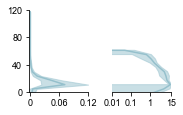

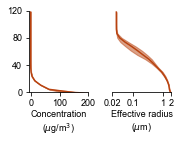

In [4]:
## plotting as dust+ice
## dust content and size


alt = calcDict['altDatum'][0,0,:]
dust_conc_pre = calcDict['content_dust']
dust_size_pre = calcDict['reff_dust']
ice_conc_pre = calcDict['content_ice']
ice_size_pre = calcDict['reff_ice']

## ice
ice_conc_avg = 1e6* np.average(np.average(ice_conc_pre[0,0,:,:,:],1),1)
ice_conc_std = 1e6 * np.std(np.average(ice_conc_pre[0,0,:,:,:],1),1)

ice_size_avg = np.average(np.average(ice_size_pre[0,0,:,:,:],1),1)
ice_size_std = np.std(np.average(ice_size_pre[0,0,:,:,:],1),1)

plt.figure(2,figsize=(2.55,1.5))
plt.subplots_adjust(wspace=0.4)

# distribution
ax1 = plt.subplot(1,2,1)

altRange = [0,40,80,120]
ax1.set_ylim(0,120)
ax1.set_yticks(altRange)
ax1.set_yticklabels(altRange,fontname='Arial',fontsize=9)

ax1.plot(ice_conc_avg,alt,color='#95c0cc')
ax1.fill_betweenx(alt,ice_conc_avg+ice_conc_std,
                  x2=ice_conc_avg-ice_conc_std,color='#95c0cc',
                 alpha=0.5)
# ax1.set_xlabel('concentration\n($\mu$g/m$^{3}$)',fontname='Arial',fontsize=9)

# ax1.set_ylabel('altitude above surface (km)',fontname='Arial',fontsize=9)



ax1.set_xlim(-0.002,0.12)
iceConclabel = [0,0.06,0.12]
ax1.set_xticks(iceConclabel)
ax1.set_xticklabels(iceConclabel,fontname='Arial',fontsize=9)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# size
ax2 = plt.subplot(1,2,2)
ax2.semilogx(ice_size_avg,alt,color='#95c0cc')
ax2.fill_betweenx(alt,ice_size_avg+ice_size_std,
                  x2=ice_size_avg-ice_size_std,color='#95c0cc',
                 alpha=0.5)
# ax2.set_xlabel('effective radius\n($\mu$m)',fontname='Arial',fontsize=9)

ax2.set_xlim(0.01,15)
iceSizelabel = [0.01,0.1, 1,15]
ax2.set_xticks(iceSizelabel)
ax2.set_xticklabels(iceSizelabel,fontname='Arial',fontsize=9)

ax2.set_ylim(0,120)
ax2.set_yticks([])
ax2.set_yticklabels([])

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# plt.savefig('ice fig 1_2pt55.png',dpi=300, bbox_inches = "tight")


## dust --------------------------------------------------------------------
dust_conc_avg = 1e6 * np.average(np.average(dust_conc_pre[0,0,:,:,:],1),1)
dust_conc_std = 1e6 * np.std(np.average(dust_conc_pre[0,0,:,:,:],1),1)

dust_size_avg = np.average(np.average(dust_size_pre[0,0,:,:,:],1),1)
dust_size_std = np.std(np.average(dust_size_pre[0,0,:,:,:],1),1)


# plotting
plt.figure(4,figsize=(2.55,1.5))
plt.subplots_adjust(wspace=0.4)

# distribution
ax1 = plt.subplot(1,2,1)

altRange = [0,40,80,120]
ax1.set_ylim(0,120)
ax1.set_yticks(altRange)
ax1.set_yticklabels(altRange,fontname='Arial',fontsize=9)

ax1.plot(dust_conc_avg,alt,color='#b8420f')
ax1.fill_betweenx(alt,dust_conc_avg+dust_conc_std,
                  x2=dust_conc_avg-dust_conc_std,color='#b8420f',
                 alpha=0.5)
ax1.set_xlabel('Concentration\n($\mu$g/m$^{3}$)',fontname='Arial',fontsize=9)
# ax1.set_ylabel('altitude above surface (km)',fontname='Arial',fontsize=9)

dustConclabel = [0,100,200]
ax1.set_xticks(dustConclabel)
ax1.set_xticklabels(dustConclabel,fontname='Arial',fontsize=9)
ax1.set_xlim(-5,200)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# size
ax2 = plt.subplot(1,2,2)
ax2.semilogx(dust_size_avg,alt,color='#b8420f')
ax2.fill_betweenx(alt,dust_size_avg+dust_size_std,
                  x2=dust_size_avg-dust_size_std,color='#b8420f',
                 alpha=0.5)
ax2.set_xlabel('Effective radius\n($\mu$m)',fontname='Arial',fontsize=9)
ax2.set_xlim(0.02,2)

dustSizelabel = [0.02,0.1, 1, 2]
ax2.set_xticklabels(dustSizelabel,fontname='Arial',fontsize=9)
ax2.set_xticks(dustSizelabel)

ax2.set_ylim(0,120)
ax2.set_yticks([])
ax2.set_yticklabels([])

ax2.minorticks_off()

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# plt.savefig('dust fig 1_2pt55.png',dpi=300, bbox_inches = "tight")

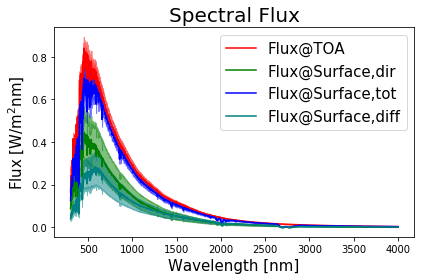

In [9]:
# ## Plot Spectral Flux Data with beam variations!

# wls = np.array(calcDict['wavelength'])
# dat = np.array(calcDict['irr_TOA'])
# dat = np.where(dat ==9.96921e+36, 0, dat)
# avg2 = np.average(dat[0,:,:,6],1)
# std2 = np.std(dat[0,:,:,6],1)
# plt.plot(wls, avg2, label='Flux@TOA', color = 'r')
# plt.fill_between(wls, avg2+std2, avg2-std2, color = 'r', alpha=.5)

# dat = np.array(calcDict['irr_edir'])
# dat = np.where(dat ==9.96921e+36, 0, dat)
# avg2 = np.average(dat[0,0,:,:,6],1)
# std2 = np.std(dat[0,0,:,:,6],1)
# plt.plot(wls, avg2, label =r'Flux@Surface,dir', color = 'g')
# plt.fill_between(wls, avg2+std2, avg2-std2, alpha=.5, color = 'g')

# wls = calcDict['wavelength']
# variable = 'irr_eglo'
# dat = np.array(calcDict[variable])
# dat = np.where(dat ==9.96921e+36, 0, dat)
# avg2 = np.average(dat[0,0,:,:,6],1)
# std2 = np.std(dat[0,0,:,:,6],1)
# plt.plot(wls, avg2, label =r'Flux@Surface,tot', color = 'b')
# plt.fill_between(wls, avg2+std2, avg2-std2, alpha = .5, color = 'b')

# dat = np.array(calcDict['irr_edn'])
# dat = np.where(dat ==9.96921e+36, 0, dat)
# avg2 = np.average(dat[0,0,:,:,6],1)
# std2 = np.std(dat[0,0,:,:,6],1)
# plt.plot(wls, avg2, label =r'Flux@Surface,diff', color = 'teal')
# plt.fill_between(wls, avg2+std2, avg2-std2, alpha=.5, color = 'teal')

# plt.xlabel('Wavelength [nm]',fontsize=15)
# plt.ylabel('Flux [W/m$^2$nm]',fontsize=15)
# plt.title('Spectral Flux', fontsize=20)
# plt.legend(fontsize=15)
# plt.tight_layout()
# # plt.savefig(figdir+'Simple Spectral Flux Fig1.png',dpi=300, bbox_inches='tight')

Text(0, 0.5, 'flux (W/m$^2$nm)')

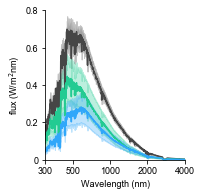

In [5]:
## Plot Spectral Flux Data with beam variations!

wls = np.array(calcDict['wavelength'])

dat = np.array(calcDict['irr_TOA'])
dat = np.where(dat == 9.96921e+36, 0, dat)
TOA_avg = np.average(dat[0,:,:,6],1)
TOA_std = np.std(dat[0,:,:,6],1)

dat = np.array(calcDict['irr_edir'])
dat = np.where(dat == 9.96921e+36, 0, dat)
dir_avg = np.average(dat[0,0,:,:,6],1)
dir_std = np.std(dat[0,0,:,:,6],1)

dat = np.array(calcDict['irr_edn'])
dat = np.where(dat ==9.96921e+36, 0, dat)
diff_avg = np.average(dat[0,0,:,:,6],1)
diff_std = np.std(dat[0,0,:,:,6],1)

dat = np.array(calcDict['irr_eglo'])
dat = np.where(dat ==9.96921e+36, 0, dat)
tot_avg12 = np.average(dat[0,0,:,:,6],1)
tot_std12 = np.std(dat[0,0,:,:,6],1)

# tot_avg6 = np.average(dat[0,0,:,:,3],1)
# tot_std6 = np.std(dat[0,0,:,:,3],1)

# tot_avg18 = np.average(dat[0,0,:,:,9],1)
# tot_std18 = np.std(dat[0,0,:,:,9],1)

# norm_avg12 = tot_avg12/(np.max(tot_avg12))
# norm_std12 = tot_std12/(np.max(tot_avg12))

# norm_avg6 = tot_avg6/(np.max(tot_avg6))
# norm_std6 = tot_std6/(np.max(tot_avg6))

# norm_avg18 = tot_avg18/(np.max(tot_avg18))
# norm_std18 = tot_std18/(np.max(tot_avg18))

plt.figure(figsize=(2.5,2.75))
ax1 = plt.subplot(111)
ax1.semilogx(wls, tot_avg12, color = '#464646')
ax1.fill_between(wls, tot_avg12+tot_std12, tot_avg12-tot_std12, color='#464646', alpha=0.3)

ax1.semilogx(wls, dir_avg, color='#23cb92')
ax1.fill_between(wls, dir_avg+dir_std, dir_avg-dir_std, color='#23cb92', alpha=0.3)

ax1.semilogx(wls,diff_avg,color='#30a7fa')
ax1.fill_between(wls, diff_avg+diff_std, diff_avg-diff_std, color='#30a7fa', alpha=0.3)

# ax1.semilogx(wls,TOA_avg,color='k')

# 6 am total
# ax1.semilogx(wls, norm_avg6, color = '#c11543')
# # ax1.fill_between(wls, norm_avg6+norm_std6, norm_avg6-norm_std6, color='#c11543', alpha=0.3)

# # 10 am total
# ax1.semilogx(wls, norm_avg18)
# ax1.fill_between(wls, norm_avg18+norm_std18, norm_avg18-norm_std18, alpha=0.3)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

wlsRange = [300,500,1000,2000,4000]
ax1.set_xlim(300,4000)
ax1.set_xticks(wlsRange)
ax1.set_xticklabels(wlsRange,fontsize=9,fontname='Arial')
ax1.minorticks_off()
ax1.set_xlabel('Wavelength (nm)',fontsize=9,fontname='Arial')

irrRange = [0,0.2,0.4,0.6,0.8]
ax1.set_ylim(0,0.8)
ax1.set_yticks(irrRange)
ax1.set_yticklabels(irrRange,fontsize=9,fontname='Arial')
ax1.set_ylabel('flux (W/m$^2$nm)',fontsize=9,fontname='Arial')

# print(np.max(tot_avg))

# plt.savefig('Simple Spectral Flux Fig1 no border tall with TOA.png',dpi=300, bbox_inches='tight')

## Figure 2

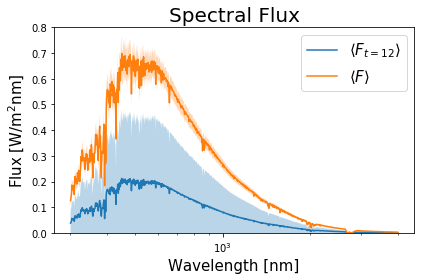

In [5]:
# ## Plot Spectral Flux with Time/Year variations

# dat = np.where(calcDict['irr_eglo']==9.96921e+36, 0, calcDict['irr_eglo'])
# avg1 = np.average(np.average(dat[0,0,:,:,:],1),1)
# std1 = np.std(np.average(dat[0,0,:,:,:],1),1)
# avg2 = np.average(dat[0,0,:,:,6],1)
# std2 = np.std(dat[0,0,:,:,6],1)
# plt.semilogx(wls, avg1, label = r'$\langle F_{t=12}\rangle$')
# plt.fill_between(wls, avg1+std1, avg1-std1, alpha=.3)
# plt.plot(wls, avg2, label =r'$\langle F\rangle$')
# plt.fill_between(wls, avg2+std2, avg2-std2, alpha=.3)
# plt.ylim([0,0.8])
# plt.xlabel('Wavelength [nm]',fontsize=15)
# plt.ylabel(r'Flux [W/m$^2$nm]',fontsize=15)
# plt.title('Spectral Flux', fontsize=20)
# plt.legend(fontsize=15)
# plt.tight_layout()
# plt.savefig(figdir+'Simple Spectral Flux.png',dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

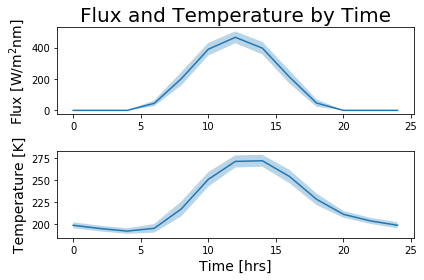

<Figure size 432x288 with 0 Axes>

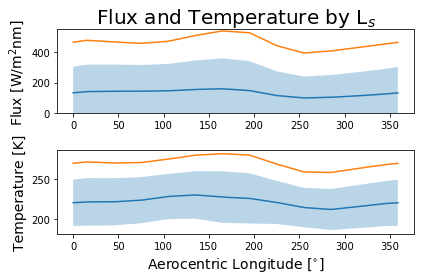

In [6]:
t = np.array(calcDict['time'])
ls = np.array(calcDict['aerolongitudes'])

plt.figure()
plt.subplots()
plt.subplot(2,1,1)
avg = np.average(calcDict['flux_dw_sw'][0,0,:,:],0)
std = np.std(calcDict['flux_dw_sw'][0,0,:,:],0)
plt.plot(t,avg)
plt.fill_between(t, avg-std, avg+std, alpha=0.3)
plt.ylabel(r'Flux [W/m$^{2}$nm]', fontsize=14)
plt.title('Flux and Temperature by Time',fontsize=20)

plt.subplot(2,1,2)
avg = np.average(calcDict['temperature'][0,0,0,:,:],0)
std = np.std(calcDict['temperature'][0,0,0,:,:],0)
plt.plot(t,avg)
plt.fill_between(t, avg-std, avg+std, alpha=0.3)
plt.xlabel('Time [hrs]', fontsize=14)
plt.ylabel('Temperature [K]',fontsize=14)
plt.tight_layout()
plt.savefig(figdir+'Flux and Temperature by Time.png',dpi=300, bbox_inches='tight')


plt.figure()
plt.subplots()
plt.subplot(2,1,1)

avg = np.average(calcDict['flux_dw_sw'][0,0,:,:],1)
std = np.std(calcDict['flux_dw_sw'][0,0,:,:],1)
plt.plot(ls,avg)
plt.fill_between(ls, avg-std, avg+std, alpha=0.3)

avg = calcDict['flux_dw_sw'][0,0,:,6]
# std = np.std(temperature[0,0,0,:,],1)
plt.plot(ls,avg)
# plt.fill_between(ls, avg-std, avg+std, alpha=0.3)
plt.ylim([0,np.max(avg)+10])
plt.ylabel(r'Flux [W/m$^{2}$nm]',fontsize=14)
plt.title(r'Flux and Temperature by L$_{s}$',fontsize=20)

plt.subplot(2,1,2)
avg = np.average(calcDict['temperature'][0,0,0,:,:],1)
std = np.std(calcDict['temperature'][0,0,0,:,:],1)
plt.plot(ls,avg)
plt.fill_between(ls, avg-std, avg+std, alpha=0.3)

avg = calcDict['temperature'][0,0,0,:,6]
# std = np.std(temperature[0,0,0,:,],1)
plt.plot(ls,avg)
# plt.fill_between(ls, avg-std, avg+std, alpha=0.3)
plt.xlabel(r'Aerocentric Longitude [$^{\circ}$]',fontsize=14)
plt.ylabel('Temperature [K]',fontsize=14)
plt.tight_layout()
plt.savefig(figdir+'Flux and Temperature by Ls.png',dpi=300, bbox_inches='tight')

In [6]:
## Define functions for timecourse evaluation

def timecourseDaily(calcDict, variable):

    ## Define some variables
    ls = np.array(calcDict['aerolongitudes'])
    time = np.array(calcDict['time'])
    F = 96500
    Ls2sol = get_Ls2sol()

    ## Collapse the ls and time arrays into a single time array
    timeFull_hr = []
    for l in ls:
        timeFull_hr.extend(time+Ls2sol(l)*24.659790025)

    ## Get rid of any annoying fill value errors
    dat = np.array(calcDict[variable])
    dat = np.where(dat == 9.96921e+36, 0, dat)

    ## Determine which variable we're using and assign variables
    if 'H2' in variable:
        Eredox = 1.23
        n = 2
        convkg = 2.02e-3
    elif 'NH3' in variable:
        Eredox = 1.17
        n = 6
        convkg = 17.031e-3
    elif 'AA' in variable:
        Eredox = 1.09
        n = 8
        convkg = 60.052e-3
    else: #this means PV
        Eredox = 1
        n = 1
        F = 1
        convkg = 1

    ## Define resultant variable multiplier
    multiplier = convkg/(Eredox*n*F)

    ## Get the shape of the array (1D, 2D, 3D)
    s = np.shape(dat[0,0])
    dim = len(s) - 2

    ## calculate the important production arrays
    vals = []
    if dim == 1:
        a = [calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x]*.01 * multiplier for x in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.argmax(c)
        for y in range(0,len(ls)):
            val = np.trapz(a[d2][y][:],x=time)
            vals.append(val)
    elif dim == 2:
        a = [[calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x,y]*.01 * multiplier for x in range(0,s[dim])] for y in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],s[dim],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.unravel_index(np.ndarray.argmax(c),np.shape(c))
        for y in range(0,len(ls)):
            val = np.trapz(a[d2[0]][d2[1]][y][:],x=time)
            vals.append(val)
    elif dim == 3:
        a = [[[calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x,y,z]*.01 * multiplier for x in range(0,s[dim-1])] for y in range(0,s[dim])] for z in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],s[dim],s[dim-1],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.unravel_index(np.ndarray.argmax(c),np.shape(c))
        for y in range(0,len(ls)):
            val = np.trapz(a[d2[0]][d2[1]][d2[2]][y][:],x=time)
            vals.append(val)
    else:
        print('You fucked up your dimensions!')

    return(d2)

def get_Ls2sol(directory='extras/', filename='sols_2_Ls.pickle'):
    fpickle = open(directory+filename, 'rb')
    [sols,Lss,radii] = pickle.load(fpickle)
    Ls2sol = interp1d(Lss,sols, 'cubic')
    return Ls2sol

Ls2sol = get_Ls2sol()


In [7]:
## flux and temp over one day
flux_t_avg = np.average(calcDict['flux_dw_sw'][0,0,:,:],0)
flux_t_std = np.std(calcDict['flux_dw_sw'][0,0,:,:],0)

T_t_avg = np.average(calcDict['temperature'][0,0,0,:,:],0)
T_t_std = np.std(calcDict['temperature'][0,0,0,:,:],0)

## pulling PV, PEC daily data using max production band gaps

# PV
bgsPV = timecourseDaily(calcDict,'j3_etaPV_3bg')
PV_eta_avg = np.average(calcDict['j3_etaPV_3bg'][0,0,:,:,bgsPV[0],bgsPV[1],bgsPV[2]],0)
PV_eta_std = np.std(calcDict['j3_etaPV_3bg'][0,0,:,:,bgsPV[0],bgsPV[1],bgsPV[2]],0)

print('PV bg indices')
print(bgsPV)

# PEC
#H2
bgsH2 = timecourseDaily(calcDict,'j2_etaPEC_H2_2bg')
PEC_H2_eta_avg = np.average(calcDict['j2_etaPEC_H2_2bg'][0,0,:,:,bgsH2[0],bgsH2[1]],0)
PEC_H2_eta_std = np.std(calcDict['j2_etaPEC_H2_2bg'][0,0,:,:,bgsH2[0],bgsH2[1]],0)

print('H2 bg indices')
print(bgsH2)

#NH3
bgsNH3 = timecourseDaily(calcDict,'j2_etaPEC_NH3_2bg')
PEC_NH3_eta_avg = np.average(calcDict['j2_etaPEC_NH3_2bg'][0,0,:,:,bgsNH3[0],bgsNH3[1]],0)
PEC_NH3_eta_std = np.std(calcDict['j2_etaPEC_NH3_2bg'][0,0,:,:,bgsNH3[0],bgsNH3[1]],0)

print('NH3 bg indices')
print(bgsNH3)

#AA
bgsAA = timecourseDaily(calcDict,'j2_etaPEC_AA_2bg')
PEC_AA_eta_avg = np.average(calcDict['j2_etaPEC_AA_2bg'][0,0,:,:,bgsAA[0],bgsAA[1]],0)
PEC_AA_eta_std = np.std(calcDict['j2_etaPEC_AA_2bg'][0,0,:,:,bgsAA[0],bgsAA[1]],0)

print('AA bg indices')
print(bgsAA)

C:\Users\antho\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\antho\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


PV bg indices
(33, 16, 27)
H2 bg indices
(57, 43)
NH3 bg indices
(53, 40)
AA bg indices
(49, 37)


Text(0.5, 0, 'Time (hr)')

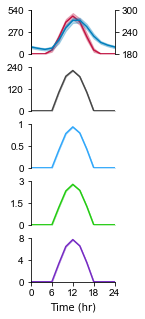

In [8]:
## plotting
plt.figure(1,figsize=(1.5,5))
plt.subplots_adjust(hspace=0.3)

t = np.array(calcDict['time'])

# flux and temp
ax1 = plt.subplot(5,1,1)

ax1.plot(t,flux_t_avg,color='#c11543')
ax1.fill_between(t,flux_t_avg-flux_t_std,flux_t_avg+flux_t_std,color='#c11543',alpha=0.3)
ax1.set_ylim(0,540)

fluxTicks = [0,270,540]
ax1.set_yticks(fluxTicks)
ax1.set_yticklabels(fluxTicks,fontname='Arial',fontsize=10)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim(0,24)
ax1.set_xticks([])

# T
ax1T = ax1.twinx()
ax1T.plot(t,T_t_avg,color='#007ebc')
ax1T.fill_between(t,T_t_avg-T_t_std,T_t_avg+T_t_std,color='#007ebc',alpha=0.3)

ax1T.spines['top'].set_visible(False)
ax1T.spines['bottom'].set_visible(False)
ax1T.set_xlim(0,24)
ax1T.set_xticks([])

tempTicks = [180,240,300]
ax1T.set_yticks(tempTicks)
ax1T.set_yticklabels(tempTicks,fontname='Arial',fontsize=10)

# PV
# clear inf values
PV_eta = np.where(PV_eta_avg<100,PV_eta_avg,0)
PV_std = np.where(PV_eta_std<1000,PV_eta_std,0)

# calc production vals
PV_t_avg = PV_eta * flux_t_avg * 0.01
PV_t_std = PV_std * flux_t_avg * 0.01

# plot PV
ax2 = plt.subplot(5,1,2)
ax2.plot(t,PV_t_avg,color='#464646')
ax2.fill_between(t,PV_t_avg-PV_t_std,PV_t_avg+PV_t_std,color='#464646',alpha=0.3)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xlim(0,24)
ax2.set_xticks([])

ax2.set_ylim(0,240)
PVticks = [0, 120, 240]

ax2.set_yticks(PVticks)
ax2.set_yticklabels(PVticks,fontname='Arial',fontsize=10)

# PEC

# H2
# clear inf values
PEC_H2_avg = np.where(PEC_H2_eta_avg<100,PEC_H2_eta_avg,0)
PEC_H2_std = np.where(PEC_H2_eta_std<1000,PEC_H2_eta_std,0)

# calc production vals
H2_t_avg_mg = PEC_H2_avg * flux_t_avg * 0.01 * 2.02e3 / (96500 * 2 * 1.23)
H2_t_std_mg = PEC_H2_std * flux_t_avg * 0.01 * 2.02e3 / (96500 * 2 * 1.23)

# plotting
ax3 = plt.subplot(5,1,3)
ax3.plot(t,H2_t_avg_mg,color='#30a7fa')
ax3.fill_between(t,H2_t_avg_mg-H2_t_std_mg,H2_t_avg_mg+H2_t_std_mg,color='#30a7fa',alpha=0.3)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xlim(0,24)
ax3.set_xticks([])

ax3.set_ylim(0,1)
H2ticks = [0,0.5,1]

ax3.set_yticks(H2ticks)
ax3.set_yticklabels(H2ticks,fontname='Arial',fontsize=10)

# NH3
# clear inf values
PEC_NH3_avg = np.where(PEC_NH3_eta_avg<100,PEC_NH3_eta_avg,0)
PEC_NH3_std = np.where(PEC_NH3_eta_std<1000,PEC_NH3_eta_std,0)

# calc production vals
NH3_t_avg_mg = PEC_NH3_avg * flux_t_avg * 0.01 * 17.031e3 / (96500 * 6 * 1.17)
NH3_t_std_mg = PEC_NH3_std * flux_t_avg * 0.01 * 17.031e3 / (96500 * 6 * 1.17)

# plotting
ax4 = plt.subplot(5,1,4)
ax4.plot(t,NH3_t_avg_mg,color='#23cb12')
ax4.fill_between(t,NH3_t_avg_mg-NH3_t_std_mg,NH3_t_avg_mg+NH3_t_std_mg,color='#23cb12',alpha=0.3)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xlim(0,24)
ax4.set_xticks([])

ax4.set_ylim(0,3)
NH3ticks = [0,1.5,3]

ax4.set_yticks(NH3ticks)
ax4.set_yticklabels(NH3ticks,fontname='Arial',fontsize=10)

# AA
# clear inf values
PEC_AA_avg = np.where(PEC_AA_eta_avg<100,PEC_AA_eta_avg,0)
PEC_AA_std = np.where(PEC_AA_eta_std<1000,PEC_AA_eta_std,0)

# calc production vals
AA_t_avg_mg = PEC_AA_avg * flux_t_avg * 0.01 * 60.052e3 / (96500 * 8 * 1.09)
AA_t_std_mg = PEC_AA_std * flux_t_avg * 0.01 * 60.052e3 / (96500 * 8 * 1.09)

# print(np.max(AA_t_avg_mg))
# plotting
ax5 = plt.subplot(5,1,5)
ax5.plot(t,AA_t_avg_mg,color='#752ac3')
ax5.fill_between(t,AA_t_avg_mg-AA_t_std_mg,AA_t_avg_mg+AA_t_std_mg,color='#752ac3',alpha=0.3)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xlim(0,24)
ax5.set_xticks([])

ax5.set_ylim(0,8)
AAticks = [0,4,8]

ax5.set_yticks(AAticks)
ax5.set_yticklabels(AAticks,fontname='Arial',fontsize=10)

ax5.set_xlim(0,24)

dayTicks = [0, 6,12,18,24]
ax5.set_xticks(dayTicks)
ax5.set_xticklabels(dayTicks,fontname='Arial',fontsize=10)
ax5.set_xlabel('Time (hr)')

# plt.savefig('one day curve with TandF.png',dpi=300, bbox_inches='tight')

## Figure 4

In [9]:
## Define functions for timecourse evaluation

def timecourse(calcDict, variable):

    ## Define some variables
    ls = np.array(calcDict['aerolongitudes'])
    time = np.array(calcDict['time'])
    F = 96500
    Ls2sol = get_Ls2sol()

    ## Collapse the ls and time arrays into a single time array
    timeFull_hr = []
    for l in ls:
        timeFull_hr.extend(time+Ls2sol(l)*24.659790025)

    ## Get rid of any annoying fill value errors
    dat = np.array(calcDict[variable])
    dat = np.where(dat == 9.96921e+36, 0, dat)

    ## Determine which variable we're using and assign variables
    if 'H2' in variable:
        Eredox = 1.23
        n = 2
        convkg = 2.02e-3
    elif 'NH3' in variable:
        Eredox = 1.17
        n = 6
        convkg = 17.031e-3
    elif 'AA' in variable:
        Eredox = 1.09
        n = 8
        convkg = 60.052e-3
    else:
        Eredox = 1
        n = 1
        F = 1
        convkg = 1

    ## Define resultant variable multiplier
    multiplier = convkg/(Eredox*n*F)

    ## Get the shape of the array (1D, 2D, 3D)
    s = np.shape(dat[0,0])
    dim = len(s) - 2

    ## calculate the important production arrays
    vals = []
    if dim == 1:
        a = [calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x]*.01 * multiplier for x in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.argmax(c)
        for y in range(0,len(ls)):
            val = np.trapz(a[d2][y][:],x=time)
            vals.append(val)
    elif dim == 2:
        a = [[calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x,y]*.01 * multiplier for x in range(0,s[dim])] for y in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],s[dim],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.unravel_index(np.ndarray.argmax(c),np.shape(c))
        for y in range(0,len(ls)):
            val = np.trapz(a[d2[0]][d2[1]][y][:],x=time)
            vals.append(val)
    elif dim == 3:
        a = [[[calcDict['flux_dw_sw'][0,0,:,:] * dat[0,0,:,:,x,y,z]*.01 * multiplier for x in range(0,s[dim-1])] for y in range(0,s[dim])] for z in range(0,s[dim+1])]
        b = np.reshape(a,(s[dim+1],s[dim],s[dim-1],13*223))
        c = np.sum(b,dim)
        d1 = np.max(c)
        d2 = np.unravel_index(np.ndarray.argmax(c),np.shape(c))
        for y in range(0,len(ls)):
            val = np.trapz(a[d2[0]][d2[1]][d2[2]][y][:],x=time)
            vals.append(val)
    else:
        print('You fucked up your dimensions!')

    return(vals)

def get_Ls2sol(directory='extras/', filename='sols_2_Ls.pickle'):
    fpickle = open(directory+filename, 'rb')
    [sols,Lss,radii] = pickle.load(fpickle)
    Ls2sol = interp1d(Lss,sols, 'cubic')
    return Ls2sol

Ls2sol = get_Ls2sol()


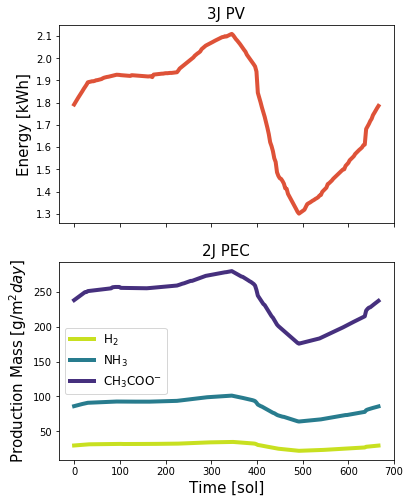

<Figure size 432x288 with 0 Axes>

In [8]:
# variablesPV = ['j1_etaPV']
# variablesPV = ['j1_etaPV', 'j2_etaPV_2bg', 'j3_etaPV_3bg']
# variablesPV = ['j3_etaPV_3bg']
# # colorPV = ['goldenrod', 'azure', 'sienna']
# colorPV = ['#de5238']

# ls = np.array(calcDict['aerolongitudes'])

# # variablesPEC = ['j1_etaPEC_H2', 'j1_etaPEC_NH3', 'j1_etaPEC_AA', 'j2_etaPEC_H2_2bg', 'j2_etaPEC_NH3_2bg', 'j2_etaPEC_AA_2bg']
# # variablesPEC = ['j1_etaPEC_H2', 'j1_etaPEC_NH3']
# variablesPEC = ['j2_etaPEC_H2_2bg', 'j2_etaPEC_NH3_2bg', 'j2_etaPEC_AA_2bg']
# colorPEC = ['#c8e020','#287c8e', '#46307e']
# labelPEC = ['H$_{2}$', 'NH$_{3}$', 'CH$_{3}$COO$^{-}$']


# f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,8))
# i = 0
# for variable in variablesPV:
#     vals = timecourse(calcDict, variable)
#     ax1.plot(Ls2sol(ls),np.array(vals) / 1000, label=variablesPV[i], linewidth=4, color=colorPV[i])
#     i += 1
# # ax1.set_xlabel('Time [sol]')
# ax1.set_ylabel('Energy [kWh/m$^{2}]', fontsize=15)
# ax1.set_title('3J PV', fontsize=15)
# # ax1.legend()
# # plt.tight_layout()

# plt.figure()
# i = 0
# for variable in variablesPEC:
#     vals = timecourse(calcDict, variable)
#     ax2.plot(Ls2sol(ls),np.array(vals)*1000*3600, label=labelPEC[i], linewidth=4, color=colorPEC[i])
#     i += 1
# ax2.set_xlabel('Time [sol]', fontsize=15)
# ax2.set_ylabel('Production Mass [g/m$^{2}day$]', fontsize=15)
# ax2.set_title('2J PEC', fontsize=15)
# ax2.legend(fontsize=12)

# f.savefig(figdir+'PEC-PV timecourses.png',dpi=300, bbox_inches='tight')


In [10]:
# time series -- year
# t = np.array(calcDict['time'])
ls = np.array(calcDict['aerolongitudes'])

solArray = Ls2sol(ls)

# production arrays
PV = timecourse(calcDict,'j3_etaPV_3bg')
PV_kWh = np.array(PV) * 3600 * 1e-6 / 3.6

PEC_H2 = timecourse(calcDict,'j2_etaPEC_H2_2bg')
PEC_H2_g = np.array(PEC_H2)*1000*3600

PEC_NH3 = timecourse(calcDict,'j2_etaPEC_NH3_2bg')
PEC_NH3_g = np.array(PEC_NH3)*1000*3600

PEC_AA = timecourse(calcDict,'j2_etaPEC_AA_2bg')
PEC_AA_g = np.array(PEC_AA)*1000*3600



In [11]:
pv_avg = np.average(PV_kWh)
print(pv_avg)

h2_avg = np.average(PEC_H2_g)
print(h2_avg)

nh3_avg = np.average(PEC_NH3_g)
print(nh3_avg)

aa_avg = np.average(PEC_AA_g)
print(aa_avg)

1.783981
29.556053
85.96297
237.52481


[Text(0, 0, '176'), Text(0, 0, '228'), Text(0, 0, '280')]

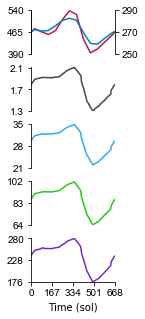

In [12]:
plt.figure(1,figsize=(1.5,5))
plt.subplots_adjust(hspace=0.3)

# flux and temp
ax1 = plt.subplot(5,1,1)

ls = np.array(calcDict['aerolongitudes'])
flux_Ls = calcDict['flux_dw_sw'][0,0,:,6]
# std = np.std(temperature[0,0,0,:,],1)
ax1.plot(ls,flux_Ls,color='#c11543')
ax1.set_ylim(390,540)

fluxTicks = [390,465,540]
ax1.set_yticks(fluxTicks)
ax1.set_yticklabels(fluxTicks,fontname='Arial',fontsize=10)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim(0,360)
ax1.set_xticks([])

# T
T_Ls = np.array(calcDict['temperature'][0,0,0,:,6])

ax1T = ax1.twinx()
ax1T.plot(ls,T_Ls,color='#007ebc')

ax1T.spines['top'].set_visible(False)
ax1T.spines['bottom'].set_visible(False)
ax1T.set_xlim(0,360)
ax1T.set_xticks([])

tempTicks = [250,270,290]
ax1T.set_yticks(tempTicks)
ax1T.set_yticklabels(tempTicks,fontname='Arial',fontsize=10)

# PV
ax2 = plt.subplot(5,1,2)
ax2.plot(solArray,PV_kWh,color='#464646')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xlim(0,668)
ax2.set_xticks([])

ax2.set_ylim(1.3,2.12)
PVticks = [1.3, 1.7, 2.1]

ax2.set_yticks(PVticks)
ax2.set_yticklabels(PVticks,fontname='Arial',fontsize=10)

# PEC

# H2
ax3 = plt.subplot(5,1,3)
ax3.plot(solArray,PEC_H2_g,color='#30a7fa')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xlim(0,668)
ax3.set_xticks([])

ax3.set_ylim(21,35)
H2ticks = [21,28,35]

ax3.set_yticks(H2ticks)
ax3.set_yticklabels(H2ticks,fontname='Arial',fontsize=10)

# NH3
ax4 = plt.subplot(5,1,4)
ax4.plot(solArray,PEC_NH3_g,color='#23cb12')

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xlim(0,668)
ax4.set_xticks([])

ax4.set_ylim(64,102)
NH3ticks = [64,83,102]

ax4.set_yticks(NH3ticks)
ax4.set_yticklabels(NH3ticks,fontname='Arial',fontsize=10)

# AA
ax5 = plt.subplot(5,1,5)
ax5.plot(solArray,PEC_AA_g,color='#752ac3')

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

ax5.set_xlim(0,668)

dayTicks = [0, 167, 334, 501, 668]
yearTicks = [0, 0.25, 0.5, 0.75, 1]
ax5.set_xticks(dayTicks)
ax5.set_xticklabels(dayTicks,fontname='Arial',fontsize=10)
ax5.set_xlabel('Time (sol)')

ax5.set_ylim(176,281)
AAticks = [176,228,280]

ax5.set_yticks(AAticks)
ax5.set_yticklabels(AAticks,fontname='Arial',fontsize=10)

# plt.savefig('production curves with TandF.png',dpi=300, bbox_inches='tight')

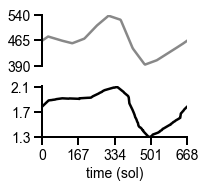

In [19]:
## For qual figures--------------------------------------------------------------------------------------------------------


plt.figure(1,figsize=(2.6,6.2))
plt.subplots_adjust(hspace=0.4)

# flux and temp
ax1 = plt.subplot(5,1,1)

ls = np.array(calcDict['aerolongitudes'])
flux_Ls = calcDict['flux_dw_sw'][0,0,:,6]
# std = np.std(temperature[0,0,0,:,],1)
ax1.plot(ls,flux_Ls,color='#888888',linewidth=2.5)
ax1.set_ylim(390,540)

fluxTicks = [390,465,540]
ax1.set_yticks(fluxTicks)
ax1.set_yticklabels(fluxTicks,fontname='Arial',fontsize=14)

ax1.tick_params(which='major', width=2, length=8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.set_xlim(0,360)
ax1.set_xticks([])

# T
# T_Ls = np.array(calcDict['temperature'][0,0,0,:,6])

# ax1T = ax1.twinx()
# ax1T.plot(ls,T_Ls,color='#007ebc')

# ax1T.spines['top'].set_visible(False)
# ax1T.spines['bottom'].set_visible(False)
# ax1T.set_xlim(0,360)
# ax1T.set_xticks([])

# tempTicks = [250,270,290]
# ax1T.set_yticks(tempTicks)
# ax1T.set_yticklabels(tempTicks,fontname='Arial',fontsize=14)

# PV
ax2 = plt.subplot(5,1,2)
ax2.plot(solArray,PV_kWh,color='#000000',linewidth=2.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2)
ax2.set_xlim(0,668)
ax2.set_xticks([])

ax2.set_ylim(1.3,2.12)
PVticks = [1.3, 1.7, 2.1]

ax2.set_yticks(PVticks)
ax2.set_yticklabels(PVticks,fontname='Arial',fontsize=14)
ax2.tick_params(which='major', width=2, length=8)

dayTicks = [0, 167, 334, 501, 668]
yearTicks = [0, 0.25, 0.5, 0.75, 1]
ax2.set_xticks(dayTicks)
ax2.set_xticklabels(dayTicks,fontname='Arial',fontsize=14)
ax2.set_xlabel('time (sol)',fontname='Arial',fontsize=14)

# PEC

# H2
# ax3 = plt.subplot(5,1,3)
# ax3.plot(solArray,PEC_H2_g,color='#bb5566',linewidth=2.5)

# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax3.set_xlim(0,668)
# ax3.set_xticks([])

# ax3.set_ylim(21,35)
# H2ticks = [21,28,35]

# ax3.set_yticks(H2ticks)
# ax3.set_yticklabels(H2ticks,fontname='Arial',fontsize=14)

# NH3
# ax4 = plt.subplot(5,1,5)
# ax4.plot(solArray,PEC_NH3_g,color='#004488',linewidth=2.5)

# ax4.spines['top'].set_visible(False)
# ax4.spines['right'].set_visible(False)

# ax4.set_xlim(0,668)
# ax4.set_xticks([])

# ax4.set_ylim(64,102)
# NH3ticks = [64,83,102]

# ax4.set_yticks(NH3ticks)
# ax4.set_yticklabels(NH3ticks,fontname='Arial',fontsize=14)

# dayTicks = [0, 167, 334, 501, 668]
# yearTicks = [0, 0.25, 0.5, 0.75, 1]
# ax4.set_xticks(dayTicks)
# ax4.set_xticklabels(dayTicks,fontname='Arial',fontsize=14)
# ax4.set_xlabel('time (sol)',fontname='Arial',fontsize=14)


# AA
# ax5 = plt.subplot(5,1,4)
# ax5.plot(solArray,PEC_AA_g,color='#ddaa33',linewidth=2.5)

# ax5.spines['top'].set_visible(False)
# ax5.spines['right'].set_visible(False)
# ax5.spines['bottom'].set_visible(False)

# ax5.set_xlim(0,668)
# ax5.set_xticks([])


# ax5.set_ylim(176,281)
# AAticks = [176,228,280]

# ax5.set_yticks(AAticks)
# ax5.set_yticklabels(AAticks,fontname='Arial',fontsize=14)

plt.savefig('Clarklab-year.png',dpi=600, bbox_inches='tight')

## More Figure 2

In [9]:
# ## Open the StupidGrid netcdf data!
# rootgrp = net.Dataset('StupidGrid.nc', "r+", format="NETCDF4")

# ## Get Variables from netCDF for plotting and calculations

# # Get 1D Variables
# ls = rootgrp.variables['aerolongitudes']
# alt = rootgrp.variables['altitude']
# lon = rootgrp.variables['longitude']
# lat = rootgrp.variables['latitude']
# time = rootgrp.variables['time']
# wl = rootgrp.variables['wavelength']

# ## Get Multidimensional Variables
# atmosgrp = rootgrp.groups['atmosphere']
# cloudgrp = rootgrp.groups['clouds']
# fluxgrp = rootgrp.groups['flux']
# dustgrp = rootgrp.groups['dust']

In [10]:

# ## Get extras like surface altitude and albedo data!
# directory = 'extras/' # assign the directory
# loc_file = 'SpecialLocations.xlsx' # assign the filename
# df = pd.read_excel(directory+loc_file) # read in the file as a pandas dataframe
# alb_file = 'surface.nc' # assign the filename
# nc = net.Dataset(directory+alb_file)

# ## Define some parameters for extras
# Lat,Lon = np.meshgrid(lat,lon) 
# Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
# zMOL = nc.variables['zMOL']
# albedo = nc.variables['albedo']

# ## Get Marker Values
# marker = ['X', 'o', '^', 'v', 'h', '<', '8', 's', 'p', 'H', '>']

# ## Plot Surface Flux Data!
# plt.figure(figsize=(12,6)) # set plot size
# m = Basemap(projection='hammer',lon_0=0)
# # m.drawmeridians(np.r_[-180.:181.:30], labels=[0,0,0,1],fontsize=15); # draw meridians 
# # m.drawparallels(np.r_[-90.:91.:30], labels=[1,0,0,0],fontsize=15); # draw parallels
# tempGrid = np.average(np.array(atmosgrp.variables['temperature'][:,:,0,:,4]),2)
# Lon,Lat = m(Lon,Lat)
# m.contourf(Lon,Lat,np.transpose(tempGrid), cmap='PuBu')
# cbar = plt.colorbar(pad=0.02)
# cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=15)
# cbar.set_label('Temperature [K]', fontsize=15)

# Lon2,Lat2 = m(Lon2,Lat2)
# plt.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')
# plt.title(r'Yearly Average Surface Temperature at $t$=12',fontsize=20)
# plt.tight_layout()
# plt.savefig(figdir+'Yearly Average Surface Temperature at noon.png', dpi=300, bbox_inches = "tight")

# ## Plot Surface Temperature Data
# plt.figure(figsize=(12,6)) # set plot size
# m = Basemap(projection='hammer',lon_0=0)
# # m.drawmeridians(np.r_[-180.:181.:30], labels=[0,0,0,1], fontsize=15); # draw meridians 
# # m.drawparallels(np.r_[-90.:91.:30], labels=[1,0,0,0],fontsize=15); # draw parallels
# fluxGrid = np.average(np.array(fluxgrp.variables['flux_dw_sw'][:,:,:,4]),2)
# m.contourf(Lon,Lat,np.transpose(fluxGrid), cmap='inferno')
# cbar = plt.colorbar(pad=0.02)
# cbar.set_label('Flux [W/m$^2$]', fontsize=15)
# cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=15)
# plt.title(r'Yearly Average Surface Flux at $t$=12',fontsize=20)


# for i in range(0,len(df['Location'])):
#     if df['Status'][i] == 'proposed':
#         c = 'k'
#         d = 'w'
#     else:
#         c = 'w'
#         d = 'k'
    
#     x,y = m(df['Longitude'][i], df['Latitude'][i])
#     m.plot(x,y, markersize=17, marker=marker[i], 
#            markeredgecolor=d, color=c,label=df['Location'][i])

# plt.legend(loc=3, fontsize=12)
# plt.contour(Lon2,Lat2,np.transpose(np.array(albedo)), cmap='gist_gray', alpha=.5)

# plt.tight_layout()
# plt.savefig(figdir+'Yearly Average Surface Flux at noon.png', dpi=300, bbox_inches = "tight")

NameError: name 'Basemap' is not defined

<Figure size 864x432 with 0 Axes>